# Machine Learning Assessment 2 
## Experiment 2
### Ronik Jayakumar
### 24680264



## Context
In this experiment, we will be exploring into the Decision Tree Classifier model which has a tree like structure to predict possible scenarios 

### 0. Import Packages

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import learning_curve

### 1.   Load Dataset

In [2]:
df = pd.read_csv('/Users/ronikj/Downloads/df.csv')
df.head()

,gender_no,car_segment,age_of_vehicle_years,sched_serv_warr,sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,Target
0,1.0,0,9,2,3,5,6,9,0
1,0.0,2,6,10,10,9,10,6,0
2,1.0,1,9,10,10,10,10,7,0
3,1.0,1,5,8,8,5,6,4,0
4,0.0,2,8,9,10,9,8,5,0


### 2. Explore Dataset

In [3]:
df.isnull().sum()

gender_no               0
car_segment             0
age_of_vehicle_years    0
sched_serv_warr         0
sched_serv_paid         0
total_paid_services     0
total_services          0
mth_since_last_serv     0
Target                  0
dtype: int64

Here we can see that the imported dataset from the previous experiment retains all its cleaned features.

### 3. Explore Target variable

In [4]:
target = df['Target']
target.value_counts()

0    127759
1      3520
Name: Target, dtype: int64

As we see a large imbalance within the dataset, the rows of the dataset will be processed to deal with the class imbalance that persists.

### 4. Explore Variables of Interest

The variables of interest have been kept constant from Experiment 1. This is due to the business finalising on the questions to be asked in experiment 1 and sticking to it to ensure questionaires do not get too lengthy. 

Therefore the variables of interest will be kept constant - gender_no, car_segment, age_of_vehicle_years, sched_serv_warr, sched_serv_paid, total_paid_services, total_services, mth_since_last_serv

### 5. Prepare Data

The data has been prepared in Experiment 1 and data preparation will be kept constant throughout all experiments to ensure uniformity for accurate model assessment.

### 6. Split Dataset

In [26]:
X_train_base, X_temp_base, y_train_base, y_temp_base = train_test_split(X, y, test_size=0.3, random_state=42)
X_test_base, X_val_base, y_test_base, y_val_base = train_test_split(X_temp_base, y_temp_base, test_size=0.5, random_state=42)

In [27]:
print("Baseline Training set shape:", X_train_base.shape, y_train_base.shape)
print("Baseline Validation set shape:", X_val_base.shape, y_val_base.shape)
print("Baseline Testing set shape:", X_test_base.shape, y_test_base.shape)

Baseline Training set shape: (91895, 8) (91895,)
Baseline Validation set shape: (19692, 8) (19692,)
Baseline Testing set shape: (19692, 8) (19692,)


### 7. Baseline Model

Logistic Regression has been chosen as the baseline model. The model is trained on the unbalanced dataset to get an idea of how the model performs when theres a large class imbalance that exists.

In [13]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train_base, y_train_base)

LogisticRegression()

In [22]:
y_train_base_pred = baseline_model.predict(X_train_base)
y_val_base_pred = baseline_model.predict(X_val_base)
y_test_base_pred = baseline_model.predict(X_test_base)

print("Training Classification Report:")
print(classification_report(y_train_base, y_train_base_pred))

print("Validation Classification Report:")
print(classification_report(y_val_base, y_val_base_pred))

print("Test Classification Report:")
print(classification_report(y_test_base, y_test_base_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     89427
           1       0.09      0.87      0.17      2468

    accuracy                           0.77     91895
   macro avg       0.55      0.82      0.52     91895
weighted avg       0.97      0.77      0.85     91895

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     19181
           1       0.09      0.89      0.17       511

    accuracy                           0.77     19692
   macro avg       0.54      0.83      0.52     19692
weighted avg       0.97      0.77      0.85     19692

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19151
           1       0.10      0.87      0.18       541

    accuracy                           0.78     19692
   macro avg       0.55      0.83 

As we can see, the model performs quite well for the majority class across all the three sets of data - Training, validation, and testing. In contrast, the scores for the minority class across all the three datasets is very poor.

We can see that the precision across all the three classification report is very low indicating that the model made a lot of false positve calls on the minority class.

The recall is relatively higher indicating that the model is predicting a decent chunk of positive instances.

Due to the high contrast between the two, the F1 score across all the three reports are consistently low

The baseline model indicates two needs:
1. The need for dealing with class imbalance
2. The need of a more comprehensive model which can identify underlying trends and patterns.

### 8. Train Machine Learning Model

### 8.1 Resampling the Dataset - SMOTETomek

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

# Print class distribution before applying SMOTETomek
print("Before resampling:", Counter(y))

# Apply SMOTETomek
sm = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100) 
X_resampled, y_resampled = smt.fit_resample(X, y.ravel())

# Print class distribution after applying SMOTETomek
print("After resampling:", Counter(y_resampled))

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (178862, 8) (178862,)
Validation set shape: (38328, 8) (38328,)
Testing set shape: (38328, 8) (38328,)


### 8.2 Training the Model - Decision Tree Classifier

In [24]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

### 9. Assess Model Performance

In [32]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))

print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     89534
           1       0.97      0.98      0.98     89328

    accuracy                           0.98    178862
   macro avg       0.98      0.98      0.98    178862
weighted avg       0.98      0.98      0.98    178862

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19212
           1       0.96      0.98      0.97     19116

    accuracy                           0.97     38328
   macro avg       0.97      0.97      0.97     38328
weighted avg       0.97      0.97      0.97     38328

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19013
           1       0.96      0.98      0.97     19315

    accuracy                           0.97     38328
   macro avg       0.97      0.

As seen above, the combination of class imbalance management and the application of a deeper machine learning model improved the models performance.

The model performs extremely well over all the three classification reports.
The training dataset understandably had the best scores with both the F1 score and accuracy at 0.98.
We see a tiny drop in scores in the validation and test sets with both reports portraying good f1 and accuracy scores of 0.97 each.

Overall we can say the generation of synthetic samples to bridge the gap in class imbalance has helped the model perform more symmetrically along the classification task.
The use of a deeper and more versatile model like Decision Tree has helped in understandig underlying traits and trends which has contributed to high overall performance metrics.

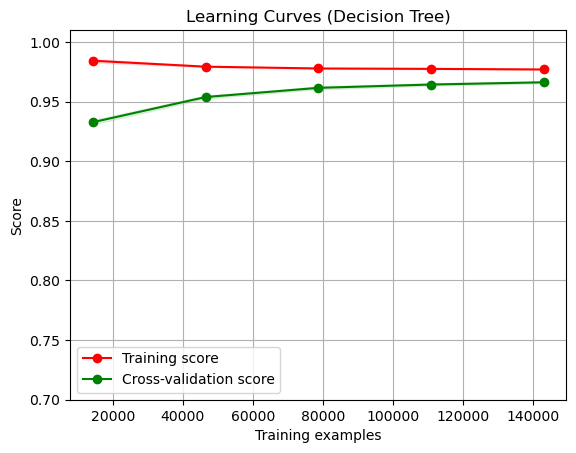

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree)"
cv = 5
plot_learning_curve(model, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

A learning curve has been plotted to visualise the overall training process. We can see how the scores have increased with each iteration and have reached similar scores towards the end.

### 10. References

[1]: Imbalanced Classification in Python: SMOTE-Tomek Links Method - Raden Aurelius Andhika Viadinugroho - Towards Data Science - April 19th 2021 - https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc